# PROPERTY SALES ANALYSIS

## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_1samp, zscore

## Loading Data

In [3]:
filename = 'PropertySales.csv'
data = pd.read_csv(filename, delimiter = ';')
df = data.copy()
display(df)

#df['BuildingValue'] = df['BuildingValue'].fillna(0)
#df['BuildingValue'] = df['BuildingValue'].astype(int)
#display(df)

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,1808 FOX CHASE DR. GOODLETTSVILLE,April 9. 2013,240000,20130412-0036474,No,FRAZIER. CYRENTHA LYNETTE,1808 FOX CHASE DR. GOODLETTSVILLE. TN,2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,1832 FOX CHASE DR. GOODLETTSVILLE,June 10. 2014,366000,20140619-0053768,No,BONER. CHARLES & LESLIE,1832 FOX CHASE DR. GOODLETTSVILLE. TN,3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,1864 FOX CHASE DR. GOODLETTSVILLE,September 26. 2016,435000,20160927-0101718,No,WILSON. JAMES E. & JOANNE,1864 FOX CHASE DR. GOODLETTSVILLE. TN,2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,1853 FOX CHASE DR. GOODLETTSVILLE,January 29. 2016,255000,20160129-0008913,No,BAKER. JAY K. & SUSAN E.,1853 FOX CHASE DR. GOODLETTSVILLE. TN,2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,1829 FOX CHASE DR. GOODLETTSVILLE,October 10. 2014,278000,20141015-0095255,No,POST. CHRISTOPHER M. & SAMANTHA C.,1829 FOX CHASE DR. GOODLETTSVILLE. TN,2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,1435 WINDING CREEK DR. NOLENSVILLE,May 27. 2015,157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,1423 WINDING CREEK DR. NOLENSVILLE,March 2. 2015,145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,1804 GRACE POINT LN. NOLENSVILLE,August 16. 2016,234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,1709 PARK TERRACE LN. NOLENSVILLE,September 7. 2016,93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

### Remove Duplicate (per rows / column)

In [4]:
#print(df.info())
print(f"terdapat data duplikat sebanyak : {df.duplicated().sum()}")
print(f"kolom : {df.columns}")

print(df['ParcelID'].isnull().sum())

# findings: Tidak ada duplikat

terdapat data duplikat sebanyak : 0
kolom : Index(['UniqueID ', 'ParcelID', 'LandUse', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'LegalReference', 'SoldAsVacant', 'OwnerName',
       'OwnerAddress', 'Acreage', 'TaxDistrict', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')
0


### Standardize Data

#### 1. Standardize nama nama kolom

In [6]:
#print(df.columns)
def columns_clean():
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.capitalize()
    return df
#print(columns_clean())
print(df.columns)



Index(['Uniqueid', 'Parcelid', 'Landuse', 'Propertyaddress', 'Saledate',
       'Saleprice', 'Legalreference', 'Soldasvacant', 'Ownername',
       'Owneraddress', 'Acreage', 'Taxdistrict', 'Landvalue', 'Buildingvalue',
       'Totalvalue', 'Yearbuilt', 'Bedrooms', 'Fullbath', 'Halfbath'],
      dtype='object')


#### 2. Mengganti type data menjadi type yang sesuai

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniqueid         56477 non-null  int64  
 1   Parcelid         56477 non-null  object 
 2   Landuse          56477 non-null  object 
 3   Propertyaddress  56448 non-null  object 
 4   Saledate         56477 non-null  object 
 5   Saleprice        56477 non-null  object 
 6   Legalreference   56477 non-null  object 
 7   Soldasvacant     56477 non-null  object 
 8   Ownername        25261 non-null  object 
 9   Owneraddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  Taxdistrict      26015 non-null  object 
 12  Landvalue        26015 non-null  float64
 13  Buildingvalue    26015 non-null  float64
 14  Totalvalue       26015 non-null  float64
 15  Yearbuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  Fullbath    

#### 3. kolom parcelid

In [10]:
#display(df.info())
#display(df['Parcelid'])

# 1. standardize kolom parcel id, mengganti spasi menjadi '-'
df['Parcelid'] = df['Parcelid'].str.replace(' ', '-')

# 2. check null values
display(df['Parcelid'].isnull().sum())

print(df.columns)

# findings: tidak ada null, hanya mengganti spasi menjadi '-'

np.int64(0)

Index(['Uniqueid', 'Parcelid', 'Landuse', 'Propertyaddress', 'Saledate',
       'Saleprice', 'Legalreference', 'Soldasvacant', 'Ownername',
       'Owneraddress', 'Acreage', 'Taxdistrict', 'Landvalue', 'Buildingvalue',
       'Totalvalue', 'Yearbuilt', 'Bedrooms', 'Fullbath', 'Halfbath'],
      dtype='object')


#### 4. kolom landuse

In [9]:
# 1. check null values
#print(df.info())
print(df['Landuse'].isnull().sum())

# 2. check landuse unique()
#display(sorted(df['Landuse'].unique()))

# 3. standardize kolom landuse
df['Landuse'] = (
    df['Landuse']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.upper()
)
#display(sorted(df['Landuse'].unique()))


# 4. hapus duplikat kategori

fix_landuse_name = {
    'CONDOMINIUM OFC OR OTHER COM CONDO': 'CONDO',
    'GREENBELT/RES GRRENBELT/RES': 'GREENBELT',
    'OFFICE BLDG (ONE OR TWO STORIES)' : 'OFFICE BUILDING',
    'VACANT RESIENTIAL LAND' : 'VACANT RESIDENTIAL LAND',
    'VACANT RES LAND' : 'VACANT RESIDENTIAL LAND'
}

df['Landuse'] = df['Landuse'].replace(fix_landuse_name)


display(sorted(df['Landuse'].unique()))

0


['APARTMENT: LOW RISE (BUILT SINCE 1960)',
 'CHURCH',
 'CLUB/UNION HALL/LODGE',
 'CONDO',
 'CONVENIENCE MARKET WITHOUT GAS',
 'DAY CARE CENTER',
 'DORMITORY/BOARDING HOUSE',
 'DUPLEX',
 'FOREST',
 'GREENBELT',
 'LIGHT MANUFACTURING',
 'METRO OTHER THAN OFC. SCHOOL.HOSP. OR PARK',
 'MOBILE HOME',
 'MORTUARY/CEMETERY',
 'NIGHTCLUB/LOUNGE',
 'NON-PROFIT CHARITABLE SERVICE',
 'OFFICE BUILDING',
 'ONE STORY GENERAL RETAIL STORE',
 'PARKING LOT',
 'PARSONAGE',
 'QUADPLEX',
 'RESIDENTIAL COMBO/MISC',
 'RESIDENTIAL CONDO',
 'RESTURANT/CAFETERIA',
 'SINGLE FAMILY',
 'SMALL SERVICE SHOP',
 'SPLIT CLASS',
 'STRIP SHOPPING CENTER',
 'TERMINAL/DISTRIBUTION WAREHOUSE',
 'TRIPLEX',
 'VACANT COMMERCIAL LAND',
 'VACANT RESIDENTIAL LAND',
 'VACANT RURAL LAND',
 'VACANT ZONED MULTI FAMILY',
 'ZERO LOT LINE']

#### 5. kolom property address

In [11]:
#display(df['Propertyaddress'].str.split())
split_address = df['Propertyaddress'].str.split()
# NOMOR RUMAH
df['Streetnumber'] = split_address.str[0]
# NAMA JALAN
df['Streetname'] = split_address.str[1:-1].str.join(' ')
# KOTA
df['City'] = split_address.str[-1]

## DROP baris property address yang null
df = df.dropna(subset= ['Propertyaddress'])
display(df[df['Propertyaddress'].isnull()])



,Uniqueid,Parcelid,Landuse,Propertyaddress,Saledate,Saleprice,Legalreference,Soldasvacant,Ownername,Owneraddress,...,Landvalue,Buildingvalue,Totalvalue,Yearbuilt,Bedrooms,Fullbath,Halfbath,Streetnumber,Streetname,City


#### 6. kolom owneraddress

In [12]:
# drop column owner address
df = df.drop(columns=['Owneraddress'])


In [13]:
#print(df.columns)

columns_to_drop = [
    'Ownerstreetnumber',
    'Ownerstreetname',
    'Ownercity',
    'Ownerstate',
    'is_same_address'
]
#df = df.drop(columns=columns_to_drop)
print(df.columns)
display(df)

Index(['Uniqueid', 'Parcelid', 'Landuse', 'Propertyaddress', 'Saledate',
       'Saleprice', 'Legalreference', 'Soldasvacant', 'Ownername', 'Acreage',
       'Taxdistrict', 'Landvalue', 'Buildingvalue', 'Totalvalue', 'Yearbuilt',
       'Bedrooms', 'Fullbath', 'Halfbath', 'Streetnumber', 'Streetname',
       'City'],
      dtype='object')


,Uniqueid,Parcelid,Landuse,Propertyaddress,Saledate,Saleprice,Legalreference,Soldasvacant,Ownername,Acreage,...,Landvalue,Buildingvalue,Totalvalue,Yearbuilt,Bedrooms,Fullbath,Halfbath,Streetnumber,Streetname,City
0,2045,007-00-0-125.00,SINGLE FAMILY,1808 FOX CHASE DR. GOODLETTSVILLE,April 9. 2013,240000,20130412-0036474,No,FRAZIER. CYRENTHA LYNETTE,2.3,...,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808,FOX CHASE DR.,GOODLETTSVILLE
1,16918,007-00-0-130.00,SINGLE FAMILY,1832 FOX CHASE DR. GOODLETTSVILLE,June 10. 2014,366000,20140619-0053768,No,BONER. CHARLES & LESLIE,3.5,...,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832,FOX CHASE DR.,GOODLETTSVILLE
2,54582,007-00-0-138.00,SINGLE FAMILY,1864 FOX CHASE DR. GOODLETTSVILLE,September 26. 2016,435000,20160927-0101718,No,WILSON. JAMES E. & JOANNE,2.9,...,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864,FOX CHASE DR.,GOODLETTSVILLE
3,43070,007-00-0-143.00,SINGLE FAMILY,1853 FOX CHASE DR. GOODLETTSVILLE,January 29. 2016,255000,20160129-0008913,No,BAKER. JAY K. & SUSAN E.,2.6,...,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853,FOX CHASE DR.,GOODLETTSVILLE
4,22714,007-00-0-149.00,SINGLE FAMILY,1829 FOX CHASE DR. GOODLETTSVILLE,October 10. 2014,278000,20141015-0095255,No,POST. CHRISTOPHER M. & SAMANTHA C.,2.0,...,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829,FOX CHASE DR.,GOODLETTSVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188-10-0A-101.00,SINGLE FAMILY,1435 WINDING CREEK DR. NOLENSVILLE,May 27. 2015,157500,20150608-0053286,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435,WINDING CREEK DR.,NOLENSVILLE
56473,27707,188-10-0A-107.00,SINGLE FAMILY,1423 WINDING CREEK DR. NOLENSVILLE,March 2. 2015,145000,20150304-0019013,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1423,WINDING CREEK DR.,NOLENSVILLE
56474,52709,188-10-0A-118.00,VACANT RESIDENTIAL LAND,1804 GRACE POINT LN. NOLENSVILLE,August 16. 2016,234611,20160819-0087214,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1804,GRACE POINT LN.,NOLENSVILLE
56475,54042,188-10-0A-121.00,VACANT RESIDENTIAL LAND,1709 PARK TERRACE LN. NOLENSVILLE,September 7. 2016,93844,20160919-0098411,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1709,PARK TERRACE LN.,NOLENSVILLE


#### 7. kolom saledate

In [14]:
display(df['Saledate'].nunique())

# 1. Hapus titik
df['Saledate'] = df['Saledate'].str.replace('.',' ')
#display(df['Saledate'])

# 2. Parse ke datetime dulu
df['Saledate'] = pd.to_datetime(df['Saledate'], format = '%B %d %Y')
#display(df['Saledate'])

# 3. Ubah format ke string dengan format day-month-year
df['Saledate'] = df['Saledate'].dt.strftime('%d-%m-%Y')
#display(df['Saledate'])

df['Saledate'] = pd.to_datetime(df['Saledate'], format = '%d-%m-%Y')
#print(df.info())
display(df['Saledate'])

1119

0       2013-04-09
1       2014-06-10
2       2016-09-26
3       2016-01-29
4       2014-10-10
           ...    
56472   2015-05-27
56473   2015-03-02
56474   2016-08-16
56475   2016-09-07
56476   2016-09-07
Name: Saledate, Length: 56448, dtype: datetime64[ns]

#### 8. kolom saleprice

In [21]:
# 1. standardize saleprice yang terdapat $,.
#display(df[df['Saleprice'].str.contains(r'[$.,]')])
#df['Saleprice'] = (
#    df['Saleprice']
#    .str.strip()
#    .str.replace(r'[$.,]', '', regex=True)
#    )
#display(df[df['Saleprice'].str.contains(r'[$.,]')])
display(df['Saleprice'])

# 2. mengganti tipe data saleprice menjadi int
df['Saleprice'] = df['Saleprice'].astype('int64')
display(df.info())

# 3. menggunakan lambda sebagai function yang menjadikan
# format integer (menambahkan titik sebagai pemisah ribuan)
#df['Saleprice'] = df['Saleprice'].apply(lambda x: f"{int(x):,}".replace(',', '.'))
#display(df)


0        240000
1        366000
2        435000
3        255000
4        278000
          ...  
56472    157500
56473    145000
56474    234611
56475     93844
56476     93844
Name: Saleprice, Length: 56448, dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 56448 entries, 0 to 56476
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Uniqueid         56448 non-null  int64         
 1   Parcelid         56448 non-null  object        
 2   Landuse          56448 non-null  object        
 3   Propertyaddress  56448 non-null  object        
 4   Saledate         56448 non-null  datetime64[ns]
 5   Saleprice        56448 non-null  int64         
 6   Legalreference   56448 non-null  object        
 7   Soldasvacant     56448 non-null  object        
 8   Ownername        25243 non-null  object        
 9   Acreage          25997 non-null  float64       
 10  Taxdistrict      25997 non-null  object        
 11  Landvalue        56448 non-null  int64         
 12  Buildingvalue    56448 non-null  int64         
 13  Totalvalue       56448 non-null  int64         
 14  Yearbuilt        56448 non-null  int64     

None

#### 9. kolom numeric (float ke int)

In [22]:
#df.info()
# 1. mengubah kolom numeric float ke integer
cols_to_int = [
    'Landvalue',
    'Buildingvalue',
    'Totalvalue',
    'Yearbuilt',
    'Bedrooms',
    'Fullbath',
    'Halfbath'
]
for cols in cols_to_int:
    df[cols] = df[cols].fillna(0).astype('int64')
#display(df)

#for cols in cols_to_int:
#    df[cols] = df[cols].apply(lambda x: f"{int(x):,}".replace(',', '.'))
#display(df)
#df['Yearbuilt'] = df['Yearbuilt'].str.replace('.','')
#display(df)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 56448 entries, 0 to 56476
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Uniqueid         56448 non-null  int64         
 1   Parcelid         56448 non-null  object        
 2   Landuse          56448 non-null  object        
 3   Propertyaddress  56448 non-null  object        
 4   Saledate         56448 non-null  datetime64[ns]
 5   Saleprice        56448 non-null  int64         
 6   Legalreference   56448 non-null  object        
 7   Soldasvacant     56448 non-null  object        
 8   Ownername        25243 non-null  object        
 9   Acreage          25997 non-null  float64       
 10  Taxdistrict      25997 non-null  object        
 11  Landvalue        56448 non-null  int64         
 12  Buildingvalue    56448 non-null  int64         
 13  Totalvalue       56448 non-null  int64         
 14  Yearbuilt        56448 non-null  int64     

#### 10. kolom soldasvacant


In [23]:
#display(df['Soldasvacant'].unique())

df['Soldasvacant'] = df['Soldasvacant'].replace({
    'Y': 'Yes',
    'N' : 'No'
})
display(df['Soldasvacant'].unique())

array(['No', 'Yes'], dtype=object)

#### 11. kolom ownername

In [ ]:
#display(df['Ownername'].unique())
#display(df['Ownername'].isnull().sum())
#print(df.shape)


# 1. split owner name jadi 2 kolom nama depan dan belakang
#display(df['Ownername'])
#display(df['Ownername'].str.split('.'))

# 2. buat kolom firstname dan lastname
df[['Lastname', 'Firstname']] = df['Ownername'].str.split('.', n=1, expand=True)
#display(df)

# 3. drop kolom ownername
#df = df.drop(columns=['Ownername'], axis=1)
#display(df)
# 4. title kolom2 yang perlu di title

cols_to_title = [
    'Lastname',
    'Firstname',
    'Landuse',
    'Propertyaddress',
    'Taxdistrict',
    'Streetname',
    'City'
]
for col in cols_to_title:
    df[col] = df[col].str.title()
display(df)

,Uniqueid,Parcelid,Landuse,Propertyaddress,Saledate,Saleprice,Legalreference,Soldasvacant,Acreage,Taxdistrict,...,Totalvalue,Yearbuilt,Bedrooms,Fullbath,Halfbath,Streetnumber,Streetname,City,Lastname,Firstname
0,2045,007-00-0-125.00,Single Family,1808 Fox Chase Dr. Goodlettsville,2013-04-09,240000,20130412-0036474,No,2.3,General Services District,...,235700,1986,3,3,0,1808,Fox Chase Dr.,Goodlettsville,Frazier,Cyrentha Lynette
1,16918,007-00-0-130.00,Single Family,1832 Fox Chase Dr. Goodlettsville,2014-06-10,366000,20140619-0053768,No,3.5,General Services District,...,319000,1998,3,3,2,1832,Fox Chase Dr.,Goodlettsville,Boner,Charles & Leslie
2,54582,007-00-0-138.00,Single Family,1864 Fox Chase Dr. Goodlettsville,2016-09-26,435000,20160927-0101718,No,2.9,General Services District,...,298000,1987,4,3,0,1864,Fox Chase Dr.,Goodlettsville,Wilson,James E. & Joanne
3,43070,007-00-0-143.00,Single Family,1853 Fox Chase Dr. Goodlettsville,2016-01-29,255000,20160129-0008913,No,2.6,General Services District,...,197300,1985,3,3,0,1853,Fox Chase Dr.,Goodlettsville,Baker,Jay K. & Susan E.
4,22714,007-00-0-149.00,Single Family,1829 Fox Chase Dr. Goodlettsville,2014-10-10,278000,20141015-0095255,No,2.0,General Services District,...,202300,1984,4,3,0,1829,Fox Chase Dr.,Goodlettsville,Post,Christopher M. & Samantha C.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188-10-0A-101.00,Single Family,1435 Winding Creek Dr. Nolensville,2015-05-27,157500,20150608-0053286,No,NaN,NaN,...,0,0,0,0,0,1435,Winding Creek Dr.,Nolensville,NaN,NaN
56473,27707,188-10-0A-107.00,Single Family,1423 Winding Creek Dr. Nolensville,2015-03-02,145000,20150304-0019013,No,NaN,NaN,...,0,0,0,0,0,1423,Winding Creek Dr.,Nolensville,NaN,NaN
56474,52709,188-10-0A-118.00,Vacant Residential Land,1804 Grace Point Ln. Nolensville,2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,...,0,0,0,0,0,1804,Grace Point Ln.,Nolensville,NaN,NaN
56475,54042,188-10-0A-121.00,Vacant Residential Land,1709 Park Terrace Ln. Nolensville,2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,...,0,0,0,0,0,1709,Park Terrace Ln.,Nolensville,NaN,NaN


#### 12. kolom acreage

In [27]:
df['Acreage'] = df['Acreage'].fillna(0)
display(df.info())
#print(df['Acreage'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 56448 entries, 0 to 56476
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Uniqueid         56448 non-null  int64         
 1   Parcelid         56448 non-null  object        
 2   Landuse          56448 non-null  object        
 3   Propertyaddress  56448 non-null  object        
 4   Saledate         56448 non-null  datetime64[ns]
 5   Saleprice        56448 non-null  int64         
 6   Legalreference   56448 non-null  object        
 7   Soldasvacant     56448 non-null  object        
 8   Acreage          56448 non-null  float64       
 9   Taxdistrict      25997 non-null  object        
 10  Landvalue        56448 non-null  int64         
 11  Buildingvalue    56448 non-null  int64         
 12  Totalvalue       56448 non-null  int64         
 13  Yearbuilt        56448 non-null  int64         
 14  Bedrooms         56448 non-null  int64     

None

#### 13. kolom taxditrict

In [30]:
#display(df['Taxdistrict'].unique())

#display(df['Taxdistrict'].isnull().sum())
#display(df[df['Taxdistrict'].isnull().sum() & df['Landvalue'] == 0])

# 1. mengisi null value menjadi unknown
df['Taxdistrict'] = df['Taxdistrict'].fillna('Unknown')
display(df['Taxdistrict'].unique())

array(['General Services District', 'Unknown', 'City Of Goodlettsville',
       'Urban Services District', 'City Of Belle Meade',
       'City Of Berry Hill', 'City Of Oak Hill', 'City Of Forest Hills'],
      dtype=object)

#### 14. kolom lastname & firstname


In [ ]:
# 1. isi null value di lastname dan lastname menjadi unknown
df[['Lastname', 'Firstname']] = df[['Lastname', 'Firstname']].fillna('Unknown')
#display(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 56448 entries, 0 to 56476
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Uniqueid         56448 non-null  int64         
 1   Parcelid         56448 non-null  object        
 2   Landuse          56448 non-null  object        
 3   Propertyaddress  56448 non-null  object        
 4   Saledate         56448 non-null  datetime64[ns]
 5   Saleprice        56448 non-null  int64         
 6   Legalreference   56448 non-null  object        
 7   Soldasvacant     56448 non-null  object        
 8   Acreage          56448 non-null  float64       
 9   Taxdistrict      56448 non-null  object        
 10  Landvalue        56448 non-null  int64         
 11  Buildingvalue    56448 non-null  int64         
 12  Totalvalue       56448 non-null  int64         
 13  Yearbuilt        56448 non-null  int64         
 14  Bedrooms         56448 non-null  int64     

None

In [574]:
display(df[df['Parcelid'].duplicated(keep=False)].head(50))

,Uniqueid,Parcelid,Landuse,Propertyaddress,Saledate,Saleprice,Legalreference,Soldasvacant,Acreage,Taxdistrict,...,Totalvalue,Yearbuilt,Bedrooms,Fullbath,Halfbath,Streetnumber,Streetname,City,Lastname,Firstname
43,6993,015-14-0-060.00,Single Family,3113 Milliken Dr. Joelton,2013-08-20,145000,20130821-0088382,No,0.98,General Services District,...,141200,1996,3,2,0,3113,Milliken Dr.,Joelton,Smith,Holli Nichole
44,43071,015-14-0-060.00,Single Family,3113 Milliken Dr. Joelton,2016-01-15,160000,20160119-0004923,No,0.98,General Services District,...,141200,1996,3,2,0,3113,Milliken Dr.,Joelton,Smith,Holli Nichole
60,8903,018-00-0-164.00,Vacant Residential Land,332 Moncrief Ave. Goodlettsville,2013-10-25,25000,20131028-0111686,No,0.39,City Of Goodlettsville,...,199900,2014,3,2,0,332,Moncrief Ave.,Goodlettsville,Bruce,William Jeffrey & Rebecca Lynn
61,16921,018-00-0-164.00,Single Family,332 Moncrief Ave. Goodlettsville,2014-06-24,219900,20140625-0055427,No,0.39,City Of Goodlettsville,...,199900,2014,3,2,0,332,Moncrief Ave.,Goodlettsville,Bruce,William Jeffrey & Rebecca Lynn
74,5807,018-07-0-045.00,Single Family,202 Lucien Rd. Goodlettsville,2013-07-26,75000,20130730-0078963,No,0.45,City Of Goodlettsville,...,132600,1957,3,1,0,202,Lucien Rd.,Goodlettsville,Carney,Billy H. & Myrtha H.
75,11694,018-07-0-045.00,Single Family,202 Lucien Rd. Goodlettsville,2014-01-14,142000,20140121-0005326,No,0.45,City Of Goodlettsville,...,132600,1957,3,1,0,202,Lucien Rd.,Goodlettsville,Carney,Billy H. & Myrtha H.
83,27163,018-07-0-109.00,Single Family,105 Bryan House Dr. Goodlettsville,2015-02-09,80000,20150210-0012443,No,0.39,City Of Goodlettsville,...,131800,1977,3,2,0,105,Bryan House Dr.,Goodlettsville,Tschirgi,Joan C. & Johnson. Chanelle A.
84,34756,018-07-0-109.00,Single Family,105 Bryan House Dr. Goodlettsville,2015-07-20,179900,20150721-0071325,No,0.39,City Of Goodlettsville,...,131800,1977,3,2,0,105,Bryan House Dr.,Goodlettsville,Tschirgi,Joan C. & Johnson. Chanelle A.
85,22716,018-07-0-142.00,Single Family,301 Mystic Hill Dr. Goodlettsville,2014-10-24,229900,20141027-0098944,No,0.35,City Of Goodlettsville,...,180400,1985,3,2,0,301,Mystic Hill Dr.,Goodlettsville,Burnett,Andrew & Kellie L.
86,50584,018-07-0-142.00,Single Family,301 Mystic Hill Dr. Goodlettsville,2016-06-07,279900,20160610-0059130,No,0.35,City Of Goodlettsville,...,180400,1985,3,2,0,301,Mystic Hill Dr.,Goodlettsville,Burnett,Andrew & Kellie L.


## EDA (SCAN FRAMEWORK)


### 1. Macro Analysis: Gambaran besar data "Apa yang terjadi?" (overview).

#### 1.1 Describe (mean median mode stdev) (Descriptive Stats)

In [33]:
print(df.describe())
print(f"mean : {round(df['Saleprice'].mean(),2)}") #mean
print(f"median : {df['Saleprice'].median()}") # median
print(f"mode : {df['Saleprice'].mode()}") # mode
print(f"stdev : {round(df['Saleprice'].std(),2)}") #stdev
print(f"skew : {round(df['Saleprice'].skew(),2)}")

# findings: sangat right skew alias terdapat outlier yang sangat besar



           Uniqueid                       Saledate     Saleprice  \
count  56448.000000                          56448  5.644800e+04   
mean   28329.464091  2015-02-08 05:30:30.612244736  3.273039e+05   
min        0.000000            2013-01-02 00:00:00  5.000000e+01   
25%    14181.750000            2014-04-11 00:00:00  1.350000e+05   
50%    28306.500000            2015-03-24 00:00:00  2.054500e+05   
75%    42503.250000            2015-12-30 00:00:00  3.288938e+05   
max    56635.000000            2019-12-13 00:00:00  5.427806e+07   
std    16352.323787                            NaN  9.300630e+05   

            Acreage     Landvalue  Buildingvalue    Totalvalue     Yearbuilt  \
count  56448.000000  5.644800e+04   5.644800e+04  5.644800e+04  56448.000000   
mean       0.229807  3.182218e+04   7.406170e+04  1.070455e+05    839.964959   
min        0.000000  0.000000e+00   0.000000e+00  0.000000e+00      0.000000   
25%        0.000000  0.000000e+00   0.000000e+00  0.000000e+00     

#### 1.2  Check the Outlier & Distributions

In [ ]:
# 1. histplot (untuk melihat distribusi *skewness)
#sns.histplot(data = df, x = 'Saleprice')
# 2. boxplot (untuk detect outlier)
sns.boxplot(data = df, x = 'Saleprice')

# 3. Check the outlier using quantile (IQR)
Q1 = df['Saleprice'].quantile(0.25)
Q3 = df['Saleprice'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df_outlier = df[df['Saleprice']>upper_bound]
df_non_outlier = df[df['Saleprice']<=upper_bound]

df['is_outlier'] = df['Saleprice'] > upper_bound
#display(df_non_outlier)
display(df[df['is_outlier']])


In [ ]:
#sns.boxplot(data = df_non_outlier, x = 'Saleprice')
sns.histplot(data = df_non_outlier, x = 'Saleprice')

#### 1.3 All numeric cols outlier & distribution checks

In [ ]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    sns.boxplot(x = df[col])
    plt.show()

# CHECK THE OUTLIER USING IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lowerbound) | (df[col] > upperbound)).sum()
    print(f"{col}: {outlier_count} outlier")

#### 1.4 Correlation (sebagai peta awal buat milih pasangan variabel yang menarik.)

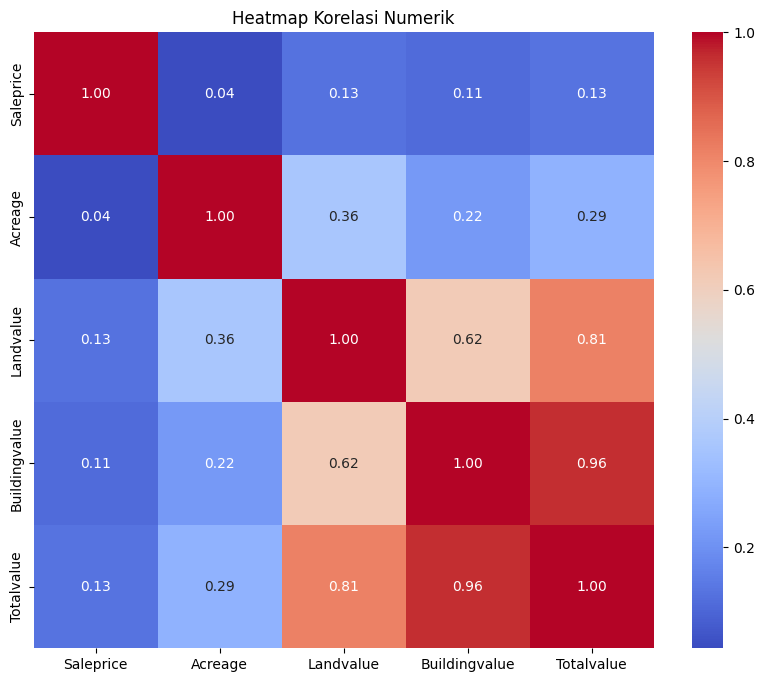

In [113]:
# cocok buat overview semua pasangan variabel numerik
# biar tahu mana yang perlu dianalisis lebih lanjut pakai scatterplot.

# 1. Heatmap korelasi numerik
corr = df[['Saleprice', 'Acreage', 'Landvalue', 'Buildingvalue', 'Totalvalue']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Numerik')
plt.show()


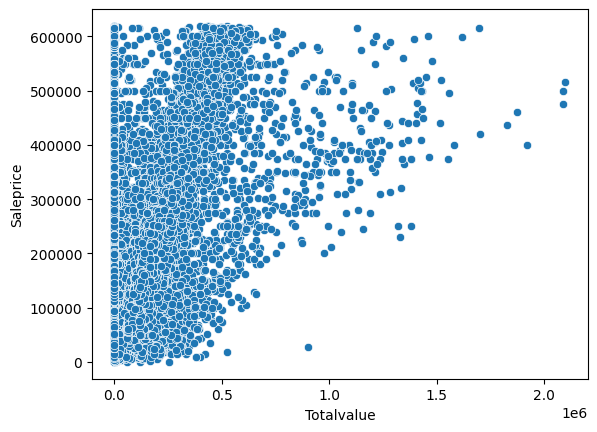

0.055401674656299
           Saleprice   Acreage
Saleprice   1.000000  0.055402
Acreage     0.055402  1.000000


In [92]:
# Scatterplot → cocok buat analisis mendalam satu pasang variabel, lihat pola & outlier.
sns.scatterplot(data = df_non_outlier, x='Totalvalue', y = 'Saleprice')
plt.show()
correlation = df_non_outlier['Saleprice'].corr(df_non_outlier['Acreage'])
#sns.heatmap(correlation, annot=True, cmap='coolwarm')
print(correlation)
print(df_non_outlier[['Saleprice', 'Acreage']].corr())

In [98]:
corr = df_non_outlier['Totalvalue'].corr(df_non_outlier['Saleprice'], method='pearson')
print(f"Korelasi Pearson: {corr:.2f}")


Korelasi Pearson: 0.29


#### 1.5 Macro Aggregation Metrics: Sebagai jembatan yang menghubungkan profil data dengan analisis hubungan yang lebih detail. > Next step Micro Analysis

In [138]:
# total transaksi pertahun
total_trans = (df_non_outlier.groupby(df_non_outlier['Saledate'].dt.year)['Saleprice']
               .sum()
               .reset_index()
)
#display(total_trans)

# rata-rata harga jual property
saleprice_avg = df_non_outlier['Saleprice'].mean()
#print(saleprice_avg)

# kota yang memiliki rata-rata harga jual tertinggi 
city_avg = (df_non_outlier.groupby(df_non_outlier['City'])['Saleprice']
            .mean()
            .reset_index()
            .sort_values(by= 'Saleprice',ascending=False)
)
#display(city_avg)

# penggunaan lahan yang mendominasi penjualan
count_per_landuse = (df_non_outlier['Landuse']
                     .value_counts()
                     .reset_index(name='count')
                     .rename(columns={'index': 'Landuse'})
)
#display(count_per_landuse)

# banyaknya property dibangun pertahunnya (Bisa tes hubungan tahun pembangunan dengan harga jual (Saleprice) → apakah properti baru rata-rata lebih mahal?)
count_property_peryear = (df_non_outlier['Yearbuilt']
                          .value_counts()
                          .reset_index()
                          .rename(columns={'index' : 'Yearbuilt'})
)
#display(count_property_peryear
#        .head(10)
#        .sort_values(by='Yearbuilt', ascending=True))

#print(df['Yearbuilt'].unique())
#print(df['Saledate'].dt.year.unique())

# top 5 and bot 5 harga rumah
top_5_property = df_non_outlier.sort_values(by= 'Saleprice',ascending=False).head(5)
display(top_5_property)
bot_5_property = df_non_outlier.sort_values(by='Saleprice',ascending=True).head(5)
display(bot_5_property)
#display(df)

# 
display(df_non_outlier['Soldasvacant'].value_counts())

,Uniqueid,Parcelid,Landuse,Propertyaddress,Saledate,Saleprice,Legalreference,Soldasvacant,Acreage,Taxdistrict,...,Yearbuilt,Bedrooms,Fullbath,Halfbath,Streetnumber,Streetname,City,Lastname,Firstname,is_outlier
32393,23689,117-09-0A-019.00,Single Family,19 Foxhall Close. Nashville,2014-11-12,619500,20141113-0104856,No,0.00,Unknown,...,0,0,0,0,19,Foxhall Close.,Nashville,Unknown,Unknown,False
42458,52978,145-09-0-002.00,Single Family,2012 Otter Valley Ln. Nashville,2016-08-26,619000,20160830-0090619,No,1.74,City Of Forest Hills,...,1968,3,2,0,2012,Otter Valley Ln.,Nashville,Fowler,Parker & Thomas. Lauren,False
31147,16487,116-08-0-019.00,Single Family,178 Woodmont Blvd. Nashville,2014-06-06,619000,20140610-0050271,No,0.46,Urban Services District,...,1928,3,2,0,178,Woodmont Blvd.,Nashville,Caldwell,Harold Pendleton. Iii & Susan,False
32653,54211,117-13-0B-036.00,Single Family,127 Abbottsford. Nashville,2016-09-22,619000,20160923-0100670,No,0.00,Unknown,...,0,0,0,0,127,Abbottsford.,Nashville,Unknown,Unknown,False
24633,42757,103-03-0-034.00,Single Family,218 54Th Ave N. Nashville,2016-01-15,618750,20160119-0005212,No,0.22,Urban Services District,...,1949,2,2,1,218,54Th Ave N.,Nashville,Williams,Shane A. & Whitney L.,False


,Uniqueid,Parcelid,Landuse,Propertyaddress,Saledate,Saleprice,Legalreference,Soldasvacant,Acreage,Taxdistrict,...,Yearbuilt,Bedrooms,Fullbath,Halfbath,Streetnumber,Streetname,City,Lastname,Firstname,is_outlier
12702,1168,081-11-0-466.00,Vacant Residential Land,0 Wheless St. Nashville,2013-03-15,50,20130320-0027369,No,0.04,Urban Services District,...,0,0,0,0,0,Wheless St.,Nashville,Woodbine Community Organization (Wco),Inc,False
1344,245,041-11-0-011.00,Single Family,4021 Dumbarton Dr. Nashville,2013-01-04,100,20130129-0009438,No,0.78,General Services District,...,1958,2,1,0,4021,Dumbarton Dr.,Nashville,Bateman,Kerry M.,False
7514,8894,070-05-0-031.00,Single Family,2415 Stivers St. Nashville,2013-10-15,100,20131016-0108113,No,0.39,Urban Services District,...,1920,2,1,0,2415,Stivers St.,Nashville,Chaffin,Neil & Sandra,False
18397,13272,091-04-0-050.00,Vacant Residential Land,0 40Th Ave N. Nashville,2014-03-10,500,20140403-0027813,Yes,0.00,Unknown,...,0,0,0,0,0,40Th Ave N.,Nashville,Unknown,Unknown,False
7560,45277,070-08-0-061.00,Vacant Residential Land,0 W Trinity Ln. Nashville,2016-03-22,750,20160323-0027506,Yes,0.07,Urban Services District,...,0,0,0,0,0,W Trinity Ln.,Nashville,Prime Nashville,Llc,False


Soldasvacant
No     48322
Yes     3969
Name: count, dtype: int64

### 2. Micro Analysis: Detail hubungan dan segmentasi data "Kenapa itu terjadi?" (detail & hubungan).

C:\Users\busto\AppData\Local\Temp\ipykernel_28272\1644321603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_outlier['price_diff'] = df_non_outlier['Saleprice'] - df_non_outlier['Totalvalue']


Rata-rata selisih: 136,525
Median selisih: 120,000
Jumlah dijual di atas appraisal: 46108
Jumlah dijual di bawah appraisal: 6134


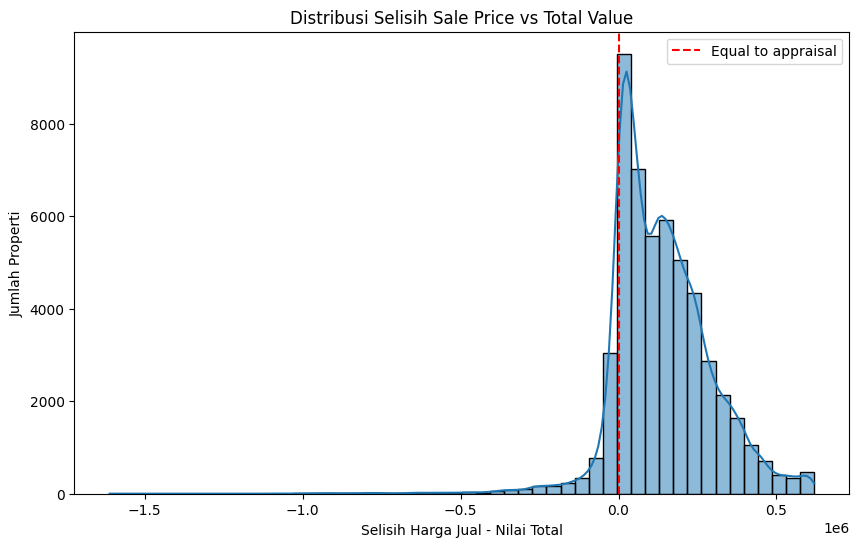

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung selisih
df_non_outlier['price_diff'] = df_non_outlier['Saleprice'] - df_non_outlier['Totalvalue']

# Statistik ringkas
mean_diff = df_non_outlier['price_diff'].mean()
median_diff = df_non_outlier['price_diff'].median()
above_count = (df_non_outlier['price_diff'] > 0).sum()
below_count = (df_non_outlier['price_diff'] < 0).sum()

print(f"Rata-rata selisih: {mean_diff:,.0f}")
print(f"Median selisih: {median_diff:,.0f}")
print(f"Jumlah dijual di atas appraisal: {above_count}")
print(f"Jumlah dijual di bawah appraisal: {below_count}")

# Plot distribusi selisih
plt.figure(figsize=(10,6))
sns.histplot(df_non_outlier['price_diff'], bins=50, kde=True)
plt.axvline(0, color='red', linestyle='--', label='Equal to appraisal')
plt.title('Distribusi Selisih Sale Price vs Total Value')
plt.xlabel('Selisih Harga Jual - Nilai Total')
plt.ylabel('Jumlah Properti')
plt.legend()
plt.show()


## Inferential Statistics: validasi & konfirmasi insight dari Macro & Micro.



In [ ]:
# 1. ANOVA ttest untuk kategori vs numeric (Saleprice)
import scipy.stats as stats

categorical_vars = ['City', 'Landuse', 'Soldasvacant']
anova_results = {}

for cat in categorical_vars:
    groups = [df[df[cat] == level]['Saleprice'] for level in df[cat].dropna().unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[cat] = {'F-statistic': f_stat, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T
print("\nHasil Uji ANOVA:")
print(anova_df)

# Interpretasi ANOVA:
# p-value < 0.05 → rata-rata Saleprice antar kategori berbeda signifikan
#Implikasi Bisnis:
#City → lokasi memengaruhi harga jual secara signifikan. 
#   Analisis lebih lanjut: ranking kota berdasarkan harga rata-rata + segmentasi pasar per kota.
#Landuse → tipe properti (residensial, komersial, industri, dll) berpengaruh signifikan ke harga jual. 
#   Bisa dipakai untuk penentuan strategi harga per tipe properti.
#Soldasvacant → status properti kosong atau terisi tidak memengaruhi harga jual secara 
#   signifikan di dataset ini. Faktor ini bisa diabaikan di model prediksi harga.


Hasil Uji ANOVA:
              F-statistic        p-value
City            22.971122   6.723860e-56
Landuse         24.741407  1.819551e-153
Soldasvacant     1.963393   1.611564e-01


In [ ]:
import pandas as pd
import numpy as np

def clean_data_pipeline(
    df, 
    fill_missing=True, 
    drop_duplicates=True, 
    detect_outliers=True
):
    # 1. Standardisasi nama kolom
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(r'[^\w\s]', '', regex=True)  # hilangin karakter aneh
    )

    # 2. Standardisasi teks
    text_cols = df.select_dtypes(include='object').columns
    for col in text_cols:
        df[col] = df[col].str.strip().str.lower()

    # 3. Convert tanggal otomatis (jika ada kata "date" / "ts" di kolom)
    date_cols = [col for col in df.columns if 'date' in col or 'ts' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # 4. Convert angka otomatis (string angka → numeric)
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col], errors='ignore')
            except:
                pass

    # 5. Handling missing values
    if fill_missing:
        for col in df.columns:
            if df[col].dtype in [np.float64, np.int64, 'Int64']:
                df[col] = df[col].fillna(df[col].median())  # median utk numeric
            else:
                df[col] = df[col].fillna('unknown')         # unknown utk string

    # 6. Drop duplicates
    if drop_duplicates: #Lo ngerti logikanya → 
        #setiap if do_xxx artinya "kalau step ini diaktifkan, jalankan prosesnya".
        df = df.drop_duplicates()

    # 7. Deteksi outlier (IQR Method)
    outliers_dict = {}
    if detect_outliers:
        num_cols = df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            if not outliers.empty:
                outliers_dict[col] = outliers.shape[0]

    return df, outliers_dict

# Contoh penggunaan:
# df = pd.read_csv("data.csv")
# df_clean, outlier_info = clean_data_pipeline(df)
# print("Outlier summary:", outlier_info)
# display(df_clean.head())
